## Código

In [ ]:
# librerias para implementar los modelos de ML
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# librerias auxiliares
import numpy as np
import matplotlib.pyplot as plt

Recuerden que la regresión polinomial en una variable tiene la forma:
$$y = \theta_0 + \theta_1 x + \theta_2 x^2 +...+\theta_nx^n  $$

In [ ]:
X = np.arange(-10,10.2,0.2)
y = 1+X+2*X**2+3*X**3 # x

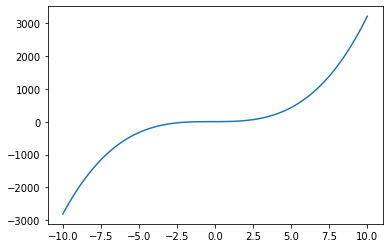

In [ ]:
plt.plot(X,y)
plt.show()

Vamos a empezar definiendo el modelo polinomial con la función `PolynomialFeatures`. De [su documentación](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomialfeatures#sklearn.preprocessing.PolynomialFeatures) en scikit learn:


> Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].


Creamos la instancia del transformador, y después *ajustamos* y *transformamos* los datos.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.3, 
                                                    random_state=42)

In [ ]:
poly = PolynomialFeatures(degree=1, include_bias=False)

In [ ]:
poly.fit(X.reshape(-1, 1))

PolynomialFeatures(degree=1, include_bias=False)

In [ ]:
poly.transform(X.reshape(-1, 1))

In [ ]:
poly_features_train = poly.fit_transform(X_train.reshape(-1, 1))

In [ ]:
poly_features_test = poly.fit_transform(X_test.reshape(-1, 1))

Realizamos nuestras particiones de prueba y entrenamiento:

Declaramos nuestro método:

In [ ]:
poly_reg_model = LinearRegression()

In [ ]:
poly_reg_model.fit(poly_features_train, y_train)

LinearRegression()

In [ ]:
y_pred = poly_reg_model.predict(poly_features_test)
y_pred

array([ 1325.35619147,   247.42289349,   656.29414445,   693.46425817,
        -124.27824374,  -347.29892608,  -979.19085937,  -161.44835746,
       -1425.23222405, -1796.93336129, -1127.87131427,  -681.82994959,
        1808.56766987,  -570.31960842,  1065.16539541, -1648.25290639,
        1659.88721498,  1102.33550913, -1350.89199661,  -644.65983587,
        1027.99528168,  1511.20676008,  -830.51040448,  -235.78858491,
         804.97459934, -1239.38165544,  -310.12881236,   879.31482679,
       -1462.40233778,  1771.39755615, -1388.06211033])

In [ ]:
error = mean_squared_error(y_test, y_pred)
error

222095.39597383392

In [ ]:
X_test.shape

(31,)

In [ ]:
y_test.shape

(31,)

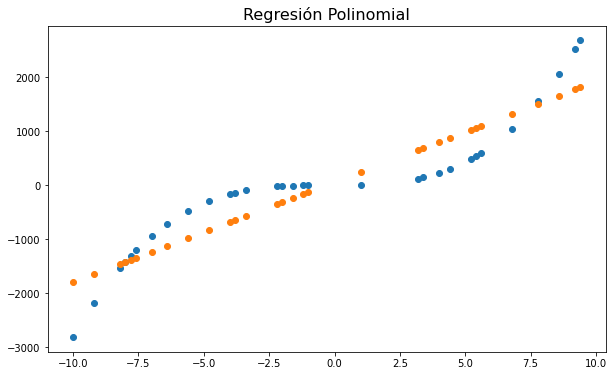

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Regresión Polinomial", size=16)
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred)
plt.show()

## Actividades

**Actividad #1**: Dibujar, con Python, la gráfica del Error Cuadrático Medio generado al iterar el grado $d$ del polinomio entre 1 y 10. Obtener los valores de $\theta$ que determina el modelo de regresión polinomial para cada valor de $d$.

In [ ]:
X = np.arange(-10,10.2,0.2)
y = 1+X+2*X**2+3*X**3 # x

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.3, 
                                                    random_state=42)

In [ ]:
from numpy.lib.function_base import append
degree = []
errores = []
for d in range(1,11):
  poly = PolynomialFeatures(degree=d, include_bias=False)
  degree.append(d)
  poly.fit(X.reshape(-1, 1))
  poly.transform(X.reshape(-1, 1))
  poly_features_train = poly.fit_transform(X_train.reshape(-1, 1))
  poly_features_test = poly.fit_transform(X_test.reshape(-1, 1))
  poly_reg_model = LinearRegression()
  poly_reg_model.fit(poly_features_train, y_train)
  y_pred = poly_reg_model.predict(poly_features_test)
  error = mean_squared_error(y_test, y_pred)
  errores.append(error)


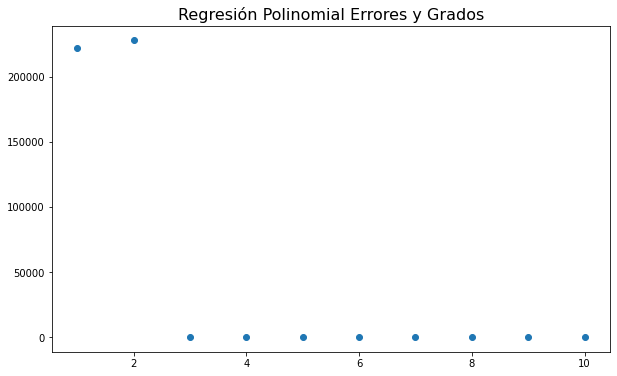

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Regresión Polinomial Errores y Grados", size=16)
plt.scatter(degree, errores)
plt.show()

**Actividad 2**: En lugar de usar regresión lineal, utilizen regresión [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) en scikit learn, y obtengan lo que se pide en la actividad 1.

In [ ]:
X = np.arange(-10,10.2,0.2)
y = 1+X+2*X**2+3*X**3 # x

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.3, 
                                                    random_state=42)

In [ ]:
degree1 = []
errores1 = []
for d in range(1,11):
  poly = PolynomialFeatures(degree=d, include_bias=False)
  degree1.append(d)
  poly.fit(X.reshape(-1, 1))
  poly.transform(X.reshape(-1, 1))
  poly_features_train = poly.fit_transform(X_train.reshape(-1, 1))
  poly_features_test = poly.fit_transform(X_test.reshape(-1, 1))
  poly_reg_model = Ridge(alpha = 0.8)
  poly_reg_model.fit(poly_features_train, y_train)
  y_pred = poly_reg_model.predict(poly_features_test)
  error = mean_squared_error(y_test, y_pred)
  errores1.append(error)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.64604e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.24847e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


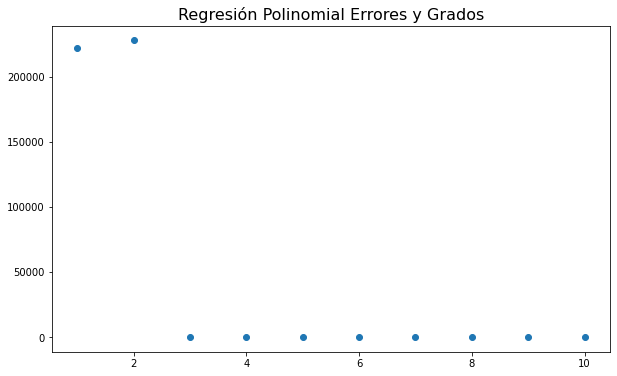

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Regresión Polinomial Errores y Grados", size=16)
plt.scatter(degree1, errores1)
plt.show()

**Actividad 3:** De las gráficas anteriores, ¿cual sería el valor óptimo (a ojo de buen cubero) para $d$? ¿Notan alguna diferencia entre ambos modelos de regresión?

Ambas gráficas muestran que a ojo de buen cubero, el valor óptimo de d es 3. Esto se debe a que de antemano sabemos que estamos ajustando un polinomio de grado 3. Hay un gran grado de error para los polinomios de grado 1 y 2 en ambos modelos de regresión. 

En los casos de d mayor o igual a 3 comenzamos a observar sobreajuste

In [ ]:
print(errores)
print(errores1)

[222095.39597383392, 227966.69203859376, 3.2608767894012835e-26, 5.411338643153904e-23, 5.545440178182847e-22, 1.6508966208846908e-20, 3.2081066226805913e-18, 3.2985128443721786e-17, 2.7005270109922062e-15, 4.2015111352352925e-13]
[222076.36876371864, 227957.79907635052, 2.6224532361993615e-05, 2.905407103057399e-05, 0.00011410499249139326, 0.00012542482033805702, 0.0002137433675338576, 0.0002696585046494448, 0.00043166804660204613, 0.00045702343115708977]


A simple vista no se nota ninguna diferencia entre los modelos. Sin embargo al imprimir los errores generados vemos que para los primeros dos grados del polinomio el modelo ridge tiene error más bajo. Desde d igual a 3 en adelante, la regresion lineal tiene un grado de error mucho menor. De d igual a 5 en adelante el error de ridge comienza a aumentar. De d igual a 4 en adelante el erorr en linear regression empieza a aumentar. Aquí se presenta el sobreajuste pero para Ridge lo está evitando porque no son errores del estilo e -20